In [121]:
def H_L_tree(f, p: int, r: int):
    
    vert = [(0,0)]
    for j in range(1,r+1):
        fj = f.change_ring(Integers(p^j))
        fzj = fj.roots(multiplicities=False)
        vert += [(z,j) for z in fzj]
    
    
    return DiGraph([vert, 
                    lambda u,v: (u[1] == 1 and v[1] == 0) 
                    or 
                    ( (u[1] == v[1]+1) and ((u[0] - v[0]) % p^v[1] ==0) ) 
                   ])

# Unika hensellyft

## x^(p-1) -1 mod p^r
p-1 nollställen mod p, alla lyfter unikt 

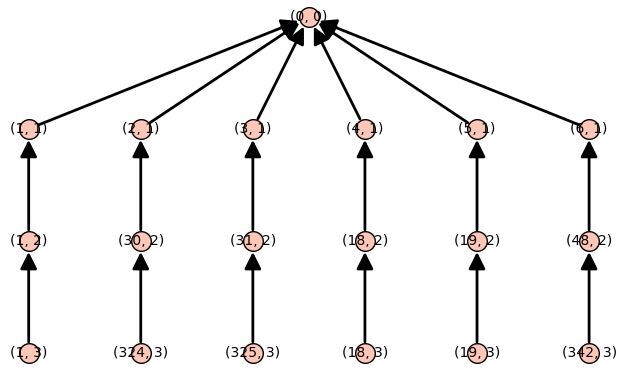

In [72]:
p=7
r=3
R.<x> = ZZ[]
f = R(x^(p-1) -1)
H_L_tree(f,p,r).plot(layout='tree')

In [74]:
# har f några rationella rötter?
f.change_ring(QQ).roots(multiplicities=False)

[1, -1]

In [ ]:
# Vi väljer en rot mod p och lyfter den

In [18]:
df = diff(f,x)
a=3
dfa=df(a)
df, dfa,f(a), f(a)%p

(6*x^5, 1458, 728, 0)

In [33]:
minv = xgcd(dfa,p)[1]
minv*dfa, minv*dfa % p

(-4374, 1)

In [35]:
y=vector(ZZ,r+1)
y[1]=a
for j in range(1,r):
    y[j+1] = (y[j] - f(y[j])*minv) % p^(j+1)
y

(0, 3, 31, 325)

In [36]:
# Vi väljer en annan rot och lyfter den
a=4
dfa=df(a)
df, dfa,f(a), f(a)%p

(6*x^5, 6144, 4095, 0)

In [39]:
# multiplikativ invers av f'(a) mod p
minv = xgcd(dfa,p)[1]
minv*dfa, minv*dfa % p

(18432, 1)

In [40]:
y=vector(ZZ,r+1)
y[1]=a
for j in range(1,r):
    y[j+1] = (y[j] - f(y[j])*minv) % p^(j+1)
y

(0, 4, 18, 18)

In [ ]:
# övning 1
# välj en tredje rot och lyft den

In [105]:
# Hitta nollställena mod p^n till följande

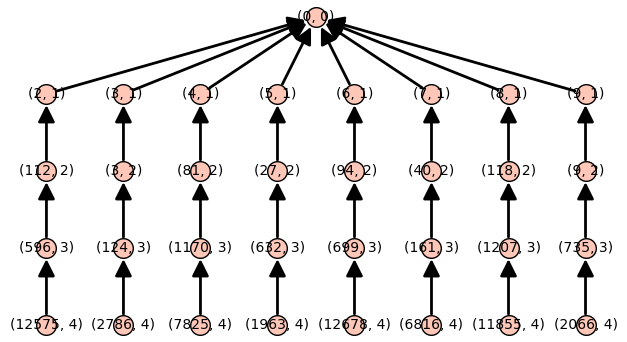

In [107]:
p=11
r=4
f=(x^(p-1)-1)
f = f.quo_rem(x^2-1)[0]
H_L_tree(f,p,r).plot(layout='tree')

In [ ]:
# övning 2
# har f några rationella rötter?
# välj någon rot mod p och lyft den

## Exempel  4.21

In [82]:
p = 5
r=4
R.<x> = ZZ[]
f = R(x^3 + x^2 + 29)

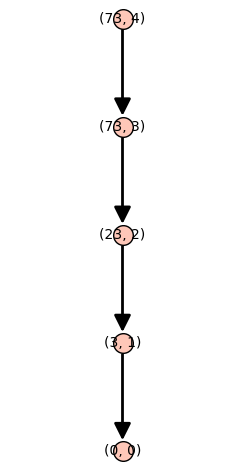

In [83]:
H_L_tree(f,p,r).plot(layout='tree')

In [84]:
# har f några rationella rötter?
f.change_ring(QQ).roots(multiplicities=False)

[]

In [85]:
# så inga rötter i ZZ, men unika roten mod p lyfter hur högt som helst
# den är en "p-adisk rot"

In [86]:
# a=3 enda nollstället mod p=5
df = diff(f,x)
a=3
dfa=df(a)
df, dfa,f(a), f(a)%p

(3*x^2 + 2*x, 33, 65, 0)

In [87]:
# multiplikativ invers av f'(a) mod p
minv = xgcd(dfa,p)[1]
minv*dfa, minv*dfa % p

(66, 1)

In [88]:
y=vector(ZZ,r+1)
y[1]=a
for j in range(1,r):
    y[j+1] = (y[j] - f(y[j])*minv) % p^(j+1)
y

(0, 3, 23, 73, 73)

In [ ]:
#inbyggt kommando

In [94]:
f.change_ring(QQ).hensel_lift(p,3)

[x + 52, x^2 + 74*x + 27]

In [96]:
-52 % 5^3

73

In [ ]:
# övning 3
# lyft ännu högre, jämför båda metoderna

## Ex 4.23

In [59]:
p = 7
r= 5
f = x^3 + x^2 +2*x + 26

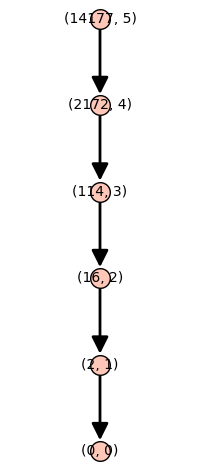

In [60]:
H_L_tree(f,p,r).plot(layout='tree')

In [61]:
# Övning 4
# Gör de unika lyften via Hensel

## Icke-unika lyft

## Ex 4.22

In [47]:
p = 3
r = 6
f = x^2 + x + 7

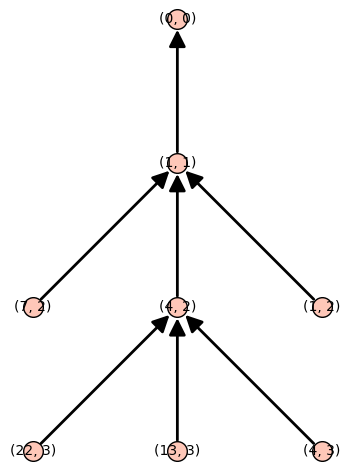

In [48]:
H_L_tree(f,p,r).plot(layout='tree')

In [49]:
# Övning 5
# Så finns lösningar upp till mod p^3 men ej mod p^4, varför?
# red ut detta, ledning nedan

In [50]:
# a=1 enda nollstället mod p=3
df = diff(f,x)
a=1
dfa=df(a)
df, dfa,f(a), f(a)%p

(2*x + 1, 3, 9, 0)

In [51]:
dfa % p

0

In [54]:
# eftersom f'(a) saknar invers mod p så är alla eller inga av lyften nollställen

In [52]:
y1 = a
y1lyft = [y1 + s*p for s in range(p)]
y2noll = [z for z in y1lyft if (f(z) % p^2) == 0]
y2noll

[1, 4, 7]

In [55]:
# Alla lyft fungerade!
# Gå vidare och försök lyfta dessa mod p^3
# För vart och ett av dessa så är antingen alla eller inga av dess lyft nollställen mod p^3

In [56]:
# övning 6
# Finns det polynom med icke-unika lyft som trots allt har nollställen mod p^n alla n, som
# inte kommer från rationella nollställen?

In [ ]:
# Ex: den rationella roten -1 är den enda som lyfter mot oändligheten

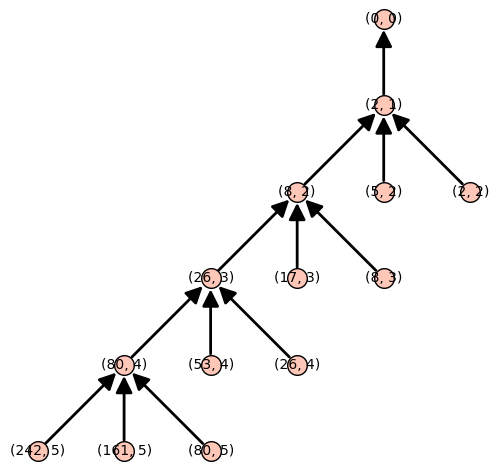

In [79]:
p=3
r=5
R.<x> = ZZ[]
f = R(x^(p^3)  + x^p +2)
H_L_tree(f,p,r).plot(layout='tree')

In [80]:
# har f några rationella rötter?
f.change_ring(QQ).roots(multiplicities=False)

[-1]

In [81]:
# Den "p-adiska roten" är i själva verket rationell!
# Kan du ge ett exempel på ett polynom utan rationella nollställen, som har en rot mod p
# som lyfter icke-unikt mot evigheten?

In [ ]:
# Ledning nedan om du kör fast

In [108]:
#
# försök med
p=2
f=x^3 - 9*x + 8

# Kvadratrötter mm

In [ ]:
# modulo ett udda primtal p så har precis hälften av elementen i
# Z_p^* kvadratrot: om Z_p^* = <g> så har g^(2k) kvadratrötter +/- g^k
# eftersom f=x^2-b har derivata 2x så
# när a^2=b mod p så f'(a)=2a <> 0
# lyfter unikt!

In [ ]:
p = 11
r = 5

In [66]:
harkvadratrot = {x^2 % p for x in range(1,p)}
harkvadratrot

{1, 3, 4, 5, 9}

In [67]:
# vi väljer något tal som har kvadratrot mod p
f = x^2 -3

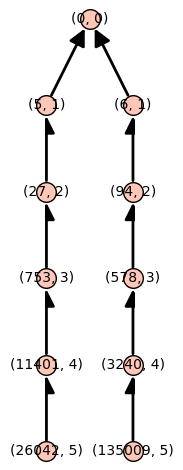

In [63]:
H_L_tree(f,p,r).plot(layout='tree')

In [68]:
# Vi lyfter den ena roten

df = diff(f,x)
a=5
dfa=df(a)
df, dfa,f(a), f(a)%p, dfa % p


(2*x, 10, 22, 0, 10)

In [70]:
# multiplikativ invers av f'(a) mod p
minv = xgcd(dfa,p)[1]
minv*dfa, minv*dfa % p

(-10, 1)

In [71]:
y=vector(ZZ,r+1)
y[1]=a
for j in range(1,r):
    y[j+1] = (y[j] - f(y[j])*minv) % p^(j+1)
y

(0, 5, 27, 753, 11401, 26042)

In [ ]:
# Övning 7
# Gör samma sak för kubrötter!

## Färdig rutin

In [100]:
def lift(f, p, k, previous):
    result = []
    df = diff(f)
    for lower_solution in previous:
        dfr = Integer(df(lower_solution))
        fr = Integer(f(lower_solution))
        if dfr % p != 0:
            t = (-(xgcd(dfr, p)[1]) * int(fr / p ** (k - 1))) % p
            result.append(lower_solution + t * p ** (k - 1))
        if dfr % p == 0:
            if fr % p ** k == 0:
                for t in range(0, p):
                    result.append(lower_solution + t * p ** (k - 1))
    return result

def hensel_lifting(f, p, k, base_solution):
    solution = base_solution
    for i in range(2, k + 1):
        solution = lift(f, p, i, solution)
    return solution


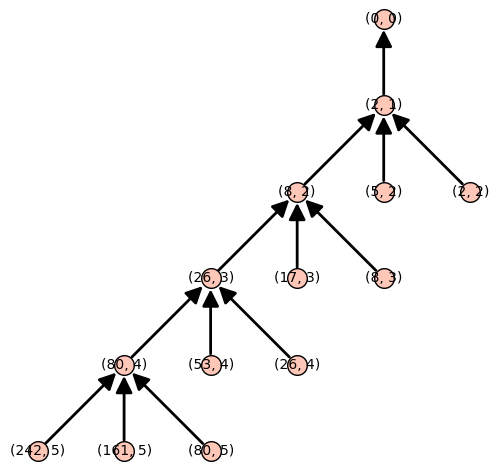

In [98]:
p=3
r=5
R.<x> = ZZ[]
f = R(x^(p^3)  + x^p +2)
H_L_tree(f,p,r).plot(layout='tree')

In [101]:
f(2), f(2) % p

(134217738, 0)

In [104]:
hensel_lifting(f,p,r-1,[2])

[26, 53, 80]

In [ ]:
# Övning 8
# Testa rutinen på något av de tidigare exemplen

# Faktorisering av heltal

In [104]:
q1 = nth_prime(200)
q2 = nth_prime(300)
N = q1*q2
p = 7
(N % p,q1 %p, q2 % p)

(2, 5, 6)

In [ ]:
r = 10
xj,yj=var('xj,yj')
s,t=var('s,t')


In [114]:
solve_mod([s*t == N],p)

[(1, 2), (2, 1), (3, 3), (4, 4), (5, 6), (6, 5)]

In [115]:
# Vi fuskar lite och startar med korrekt faktorisering mod p
xj = 5
yj = 6
j=1
eqn = N - (xj + s*p^j)*(yj + t*p^j)

In [106]:
eqn

-(7*s + 5)*(7*t + 6) + 2430101

In [107]:
eqn2=eqn.expand()
eqn2

-49*s*t - 42*s - 35*t + 2430071

In [108]:
eqn3=eqn2 / 7
eqn3

-7*s*t - 6*s - 5*t + 347153

In [109]:
soln_in_st=solve_mod([eqn3],p)
soln_in_st

[(0, 6), (1, 2), (2, 5), (3, 1), (4, 4), (5, 0), (6, 3)]

In [110]:
[(u[0],u[1]) for u in soln_in_st]

[(0, 6), (1, 2), (2, 5), (3, 1), (4, 4), (5, 0), (6, 3)]

In [111]:
soln_in_st[0][0].parent()

Ring of integers modulo 7

In [112]:
niva2lyft=[(xj+u[0].lift()*p^j,yj+u[1].lift()*p^j) for u in soln_in_st]
niva2lyft

[(5, 48), (12, 20), (19, 41), (26, 13), (33, 34), (40, 6), (47, 27)]

In [113]:
(q1 % p^(j+1),q2 % p^(j+1))

(47, 27)

In [116]:
# Uppgift 15: skriv en faktoriseringsrutin för tal som
# är prod av två olika primtal.


# Primitiva rötter

## Primitiva rötter mod p

In [9]:
# Övning 9
# Jag använde följande kod på föreläsningen:
p=nth_prime(362)
print(f'p={p}')
myfact=factor(p-1)
print(f'p-1={p-1}={myfact}')
c=mod(1,p)
C=Set([])
for fact in myfact:
    q,a=fact
    b=a-1
    h=Integers(p)[x](x^(q^a)-1)
    hh=Integers(p)[x](x^(q^b)-1)
    maxl = Set(h.roots(multiplicities=False))
    minl = Set(hh.roots(multiplicities=False))
    candidates = maxl.difference(minl)
    u = candidates[0]
    print(f'primpotensfaktor {q}^{a}')
    print(f'polynom {h},{hh}')
    print(f'nollställen till första: {maxl}, till andra: {minl}')
    print(f'väljer {u} från mängdteodiff')
    c = c*u
    C=C.union(Set([u]))
print(f'multiplicerar ihop {C}, får {c}')
print(f'{c} har ordning {multiplicative_order(c)} borde vara p-1={p-1}' )

p=2441
p-1=2440=2^3 * 5 * 61
primpotensfaktor 2^3
polynom x^8 + 2440,x^4 + 2440
nollställen till första: {672, 1, 1122, 1319, 2440, 1769, 2156, 285}, till andra: {2440, 1769, 672, 1}
väljer 1122 från mängdteodiff
primpotensfaktor 5^1
polynom x^5 + 2440,x + 2440
nollställen till första: {1, 1478, 583, 2230, 590}, till andra: {1}
väljer 590 från mängdteodiff
primpotensfaktor 61^1
polynom x^61 + 2440,x + 2440
nollställen till första: {1280, 1024, 1, 1283, 1029, 261, 1547, 1035, 1421, 1166, 1679, 1040, 268, 2067, 1300, 534, 26, 32, 676, 2214, 2086, 2344, 1832, 40, 1195, 684, 50, 2360, 2104, 697, 59, 956, 828, 446, 189, 1600, 832, 331, 2380, 845, 2127, 2000, 335, 855, 1625, 1888, 739, 1253, 103, 489, 1642, 1387, 1002, 2157, 237, 1904, 753, 2290, 1778, 509, 1534}, till andra: {1}
väljer 1280 från mängdteodiff
multiplicerar ihop {1280, 1122, 590}, får 2275
2275 har ordning 2440 borde vara p-1=2440


In [10]:
# övning 9 forts
# gör om detta till en function nagon_primrot(p: int) -> int
# testa på nth_prime(1000)

In [ ]:
# övning 10
# skriv funktion minsta_primrot(p: int) -> int
# testa den, plotta!
# ledning nedan

In [15]:
p = nth_prime(100)
primrotter = [k for k in range(2,p) if multiplicative_order(mod(k,p)) == p-1]
print(euler_phi(euler_phi(p)))
print(primrotter)
primrotter[0]

144
[2, 10, 13, 14, 18, 24, 30, 37, 40, 51, 54, 55, 59, 62, 65, 67, 68, 72, 73, 77, 83, 86, 87, 91, 94, 96, 98, 99, 107, 113, 114, 116, 117, 126, 127, 128, 131, 132, 138, 150, 152, 153, 156, 158, 163, 176, 181, 183, 184, 195, 197, 199, 206, 208, 210, 213, 218, 220, 223, 224, 244, 248, 250, 257, 258, 259, 260, 261, 263, 267, 269, 270, 271, 272, 274, 278, 280, 281, 282, 283, 284, 291, 293, 297, 317, 318, 321, 323, 328, 331, 333, 335, 342, 344, 346, 357, 358, 360, 365, 378, 383, 385, 388, 389, 391, 403, 409, 410, 413, 414, 415, 424, 425, 427, 428, 434, 442, 443, 445, 447, 450, 454, 455, 458, 464, 468, 469, 473, 474, 476, 479, 482, 486, 487, 490, 501, 504, 511, 517, 523, 527, 528, 531, 539]


2

In [13]:
# övning 11
# Kursboken visar att om p udda primtal, 
# r primrot mod p
# så är antingen r eller r+p primrot för alla p^k
# Implementera detta!
# kombinera till procedur som ger primrot för p^k

In [16]:
# Övning 12
# Skriv en procedur som ger primrot mod n för alla n som har sådan
# testa först

In [ ]:
# Övning 13 
# Om finns primrot g mod n så är g generator till Z_n^* 
# som har euler_phi(n) elem
# cycklisk grupp med m elem har euler_phi(m) elem
# så mod n finns euler_phi(euler_pji(n)) elem
# Vad är "average order" för denna funk?

In [31]:
def mystery(n):
    fak = factor(n)
    if len(fak) == 1:
        return(euler_phi(euler_phi(n)))
    elif len(fak) == 2 and fak[0][0] == 2:
        if fak[0][1] <= 2:
            return(euler_phi(euler_phi(n)))
        else:
            return 0
    else:
        return 0


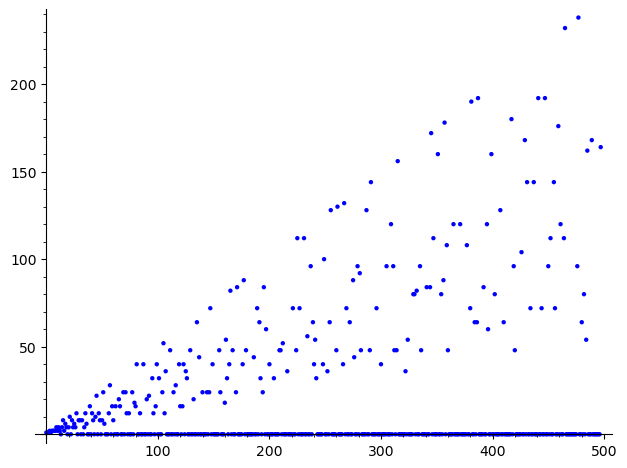

In [35]:
mysterylist=[mystery(k) for k in range(2,500)]
list_plot(mysterylist)

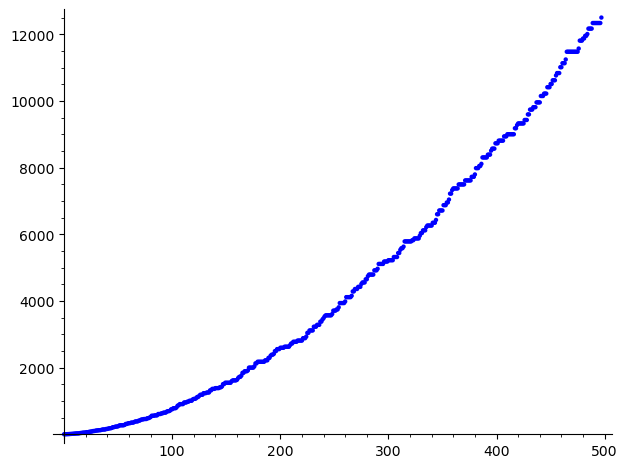

In [37]:
from itertools import accumulate
uppsummeradlista =list(accumulate(mysterylist,operator.add))
list_plot(uppsummeradlista)

# Kinesiska restsatsen

In [125]:
p1 = 5
p2=11
r=4
R.<x> = ZZ[]
f = R(x^3 + x^2 + 29)

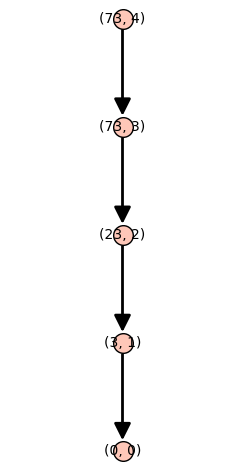

In [126]:
H_L_tree(f,p1,r).plot(layout='tree')

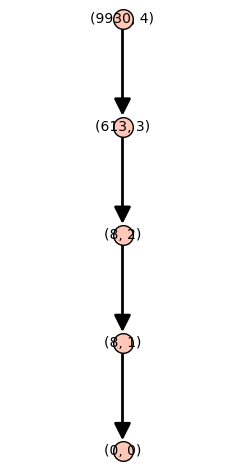

In [127]:
H_L_tree(f,p2,r).plot(layout='tree')

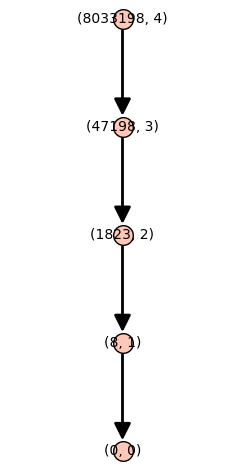

In [128]:
H_L_tree(f,p1*p2,r).plot(layout='tree')

In [ ]:
# uppgift 16: kombinera KRT och Hensellyft för att hitta nollställen till f
# mod 55 osv

In [133]:
crt(23,8,p1^2,p2^2)

1823

In [ ]:
# Uppgift 16 
# Hitta kvadratrötter mod p1^n*p2^n